### Trading bot demo

In [6]:
!pip install --upgrade pip setuptools wheel

In [1]:
!brew upgrade git

==> Downloading https://formulae.brew.sh/api/formula.jws.json
######################################################################### 100.0%
==> Downloading https://formulae.brew.sh/api/cask.jws.json
######################################################################### 100.0%


In [3]:
!brew install cmake openmpi

==> Auto-updating Homebrew...
Adjust how often this is run with HOMEBREW_AUTO_UPDATE_SECS or disable with
HOMEBREW_NO_AUTO_UPDATE. Hide these hints with HOMEBREW_NO_ENV_HINTS (see `man brew`).
==> Downloading https://ghcr.io/v2/homebrew/portable-ruby/portable-ruby/blobs/sha256:a5ef040e054444a0eb2cbcc1032fed14702dfbe2e55b25e609f3ce643f23c4ee
######################################################################### 100.0%  4.2%
==> Pouring portable-ruby-3.3.3.el_capitan.bottle.tar.gz
==> Auto-updated Homebrew!
Updated 2 taps (homebrew/core and homebrew/cask).
==> New Formulae
age-plugin-se       codecov-cli         kubelogin           poutine
ansible@9           geni                nsync
==> New Casks
font-beiruti                             font-palemonasmufi-regular
font-palemonasmufi-bold                  impel
font-palemonasmufi-bolditalic            xnapper
font-palemonasmufi-italic

You have 7 outdated formulae installed.

To reinstall 3.29.5, run:
  brew reinstall cmake
To reinsta

In [8]:
!pip install opencv-python --verbose 

Using pip 24.0 from /Users/yyt/tensorflow-test/env8/lib/python3.10/site-packages/pip (python 3.10)
  Using cached opencv-python-4.10.0.84.tar.gz (95.1 MB)
  Installing build dependencies ...   Running command pip subprocess to install build dependencies
  Ignoring numpy: markers 'python_version == "3.6" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.7" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.8" and platform_machine != "aarch64" and platform_machine != "arm64"' don't match your environment
  Ignoring numpy: markers 'python_version < "3.9" and sys_platform == "linux" and platform_machine == "aarch64"' don't match your environment
  Ignoring numpy: markers 'python_version < "3.9" and sys_platform == "darwin" and platform_machine == "arm64"' don't match your environment
    Using cached cmake

In [9]:
!pip install git+https://github.com/AI4Finance-Foundation/FinRL.git

  Cloning https://github.com/AI4Finance-Foundation/FinRL.git to /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-req-build-xl1c_1gn
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/FinRL.git /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-req-build-xl1c_1gn
  Resolved https://github.com/AI4Finance-Foundation/FinRL.git to commit df18dad2f9c3bddabe548f8b516c4798e6a11930
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-install-frh8n8ox/elegantrl_0e36622e2b8348adb426b128747ccd2e
  Running command git clone --filter=blob:none --quiet https://github.com/AI4Finance-Foundation/ElegantRL.git /private/var/folders/yb/c7x92pl93wdbf3d50bygq_zc0000gn/T/pip-install-frh8n8ox/elegantrl_0e36622e2b8348adb426b128747ccd2e
  

In [1]:
!pip install wrds
!brew install swig


To reinstall 4.2.1, run:
  brew reinstall swig


In [2]:
!git clone https://github.com/AI4Finance-Foundation/FinRL.git

Cloning into 'FinRL'...
remote: Enumerating objects: 13286, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 13286 (delta 6), reused 3 (delta 2), pack-reused 13265
Receiving objects: 100% (13286/13286), 82.00 MiB | 2.24 MiB/s, done.
Resolving deltas: 100% (8860/8860), done.


#### 1. import package

i. download and explore data

In [30]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('Agg')
import datetime

%matplotlib inline
from finrl.config_tickers import DOW_30_TICKER
from finrl.meta.preprocessor.yahoodownloader import YahooDownloader
from finrl.meta.preprocessor.preprocessors import FeatureEngineer, data_split
from finrl.meta.env_stock_trading.env_stocktrading import StockTradingEnv
from finrl.agents.stablebaselines3.models import DRLAgent,DRLEnsembleAgent
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline

from pprint import pprint

import sys
sys.path.append("../FinRL-Library")

import itertools

#### 2. create folder

In [31]:
import os
from finrl.main import check_and_make_directories
from finrl.config import (
    DATA_SAVE_DIR,
    TRAINED_MODEL_DIR,
    TENSORBOARD_LOG_DIR,
    RESULTS_DIR,
    INDICATORS,
    TRAIN_START_DATE,
    TRAIN_END_DATE,
    TEST_START_DATE,
    TEST_END_DATE,
    TRADE_START_DATE,
    TRADE_END_DATE,
)

check_and_make_directories([DATA_SAVE_DIR, TRAINED_MODEL_DIR, TENSORBOARD_LOG_DIR, RESULTS_DIR])

In [5]:
print(DOW_30_TICKER)


['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


#### 3. fetch data

In [130]:
TRAIN_START_DATE = '2009-04-01'
TRAIN_END_DATE = '2022-01-01'
TEST_START_DATE = '2022-01-01'
TEST_END_DATE = '2024-06-01'
# TRAIN_START_DATE = '2009-04-01'
# TRAIN_END_DATE = '2021-01-01'
# TEST_START_DATE = '2021-01-01'
# TEST_END_DATE = '2022-06-01'

df = YahooDownloader(start_date = TRAIN_START_DATE,
                     end_date = TEST_END_DATE,
                     ticker_list = DOW_30_TICKER).fetch_data()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

Shape of DataFrame:  (112032, 8)


In [131]:
df.head(10)

date        open        high         low      close     volume   tic  \
0  2009-04-01    3.717500    3.892857    3.710357   3.286319  589372000  AAPL   
1  2009-04-01   48.779999   48.930000   47.099998  34.498173   10850100  AMGN   
2  2009-04-01   13.340000   14.640000   13.080000  11.528119   27701800   AXP   
3  2009-04-01   34.520000   35.599998   34.209999  26.850746    9288800    BA   
4  2009-04-01   27.500000   29.520000   27.440001  19.262989   15308300   CAT   
5  2009-04-01    7.815000    8.225000    7.500000   8.161839   13760000   CRM   
6  2009-04-01   16.510000   17.540001   16.299999  11.840490   73415300  CSCO   
7  2009-04-01   66.000000   68.699997   65.830002  37.401463   14299000   CVX   
8  2009-04-01   17.920000   18.820000   17.840000  16.127497   12933600   DIS   
9  2009-04-01  104.099998  111.339996  103.940002  85.284973   24883000    GS   

   day  
0    2  
1    2  
2    2  
3    2  
4    2  
5    2  
6    2  
7    2  
8    2  
9    2

In [132]:
df.tail(10)

date        open        high         low       close    volume  \
112022  2024-05-31  125.129997  126.610001  124.550003  124.793427  18150500   
112023  2024-05-31  416.750000  416.750000  404.510010  415.130005  47995300   
112024  2024-05-31   93.500000   95.070000   92.970001   94.680008  12565600   
112025  2024-05-31  162.440002  164.770004  161.970001  164.539993  10341400   
112026  2024-05-31  212.100006  215.889999  211.619995  214.636444   2119600   
112027  2024-05-31  482.410004  498.410004  482.410004  493.277374   6694800   
112028  2024-05-31  271.440002  272.760010  269.010010  272.459991   8910000   
112029  2024-05-31   40.139999   41.279999   40.099998   41.150002  38917400   
112030  2024-05-31   15.350000   16.340000   15.340000   16.219999  29415200   
112031  2024-05-31   64.669998   65.900002   64.160004   65.760002  27632200   

         tic  day  
112022   MRK    4  
112023  MSFT    4  
112024   NKE    4  
112025    PG    4  
112026   TRV    4  
112027   UNH    4  
112028     V    4  
112029    VZ    4  
112030   WBA    4  
112031   WMT    4

In [133]:
#sort based on date and ticker
df.sort_values(['date','tic']).head(10)

date        open        high         low      close     volume   tic  \
0  2009-04-01    3.717500    3.892857    3.710357   3.286319  589372000  AAPL   
1  2009-04-01   48.779999   48.930000   47.099998  34.498173   10850100  AMGN   
2  2009-04-01   13.340000   14.640000   13.080000  11.528119   27701800   AXP   
3  2009-04-01   34.520000   35.599998   34.209999  26.850746    9288800    BA   
4  2009-04-01   27.500000   29.520000   27.440001  19.262989   15308300   CAT   
5  2009-04-01    7.815000    8.225000    7.500000   8.161839   13760000   CRM   
6  2009-04-01   16.510000   17.540001   16.299999  11.840490   73415300  CSCO   
7  2009-04-01   66.000000   68.699997   65.830002  37.401463   14299000   CVX   
8  2009-04-01   17.920000   18.820000   17.840000  16.127497   12933600   DIS   
9  2009-04-01  104.099998  111.339996  103.940002  85.284973   24883000    GS   

   day  
0    2  
1    2  
2    2  
3    2  
4    2  
5    2  
6    2  
7    2  
8    2  
9    2

#### 4. preprocess data

In [134]:
# INDICATORS = ['macd',
#                'rsi_30',
#                'cci_30',
#                'dx_30',
#                'boll_ub',
#                'boll_lb']
print(INDICATORS)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


In [135]:
fe = FeatureEngineer(use_technical_indicator=True,
                     tech_indicator_list = INDICATORS,
                     use_turbulence=True,
                     user_defined_feature = False)

processed = fe.preprocess_data(df)
processed = processed.copy()
processed = processed.fillna(0)
processed = processed.replace(np.inf,0)

Successfully added technical indicators
Successfully added turbulence index


In [136]:
processed.sample(5)

date       open       high        low      close    volume  tic  \
90699  2021-09-01  56.380001  56.799999  56.279999  51.750793   9518900   KO   
18168  2011-09-23  61.299999  61.900002  61.000000  42.829067  10983700  JNJ   
48806  2015-12-04  19.683332  19.950001  19.676666  16.818354  31305900  WMT   
17332  2011-08-12  29.952290  30.458015  29.770992  19.609556  20668132  MRK   
9023   2010-06-25  63.540001  64.709999  62.919998  45.000622  12068800  CAT   

       day      macd    boll_ub    boll_lb     rsi_30      cci_30      dx_30  \
90699    2 -0.005572  52.537187  50.712455  55.058319  -12.926635   3.605683   
18168    4 -0.271722  46.292826  43.043221  42.785328 -223.707414  38.215846   
48806    4 -0.022842  17.229464  15.844457  46.701987   60.305958   2.824338   
17332    4 -0.800102  23.760339  18.214378  39.239113 -103.136917  43.925220   
9023     4  0.475679  47.271656  38.364440  53.125987   73.464126   2.688020   

       close_30_sma  close_60_sma  turbulence  
90699     51.716109     50.905278    8.355282  
18168     44.510469     44.825740   42.249921  
48806     16.423350     17.085199   23.985240  
17332     21.459347     21.864114   58.934884  
9023      42.738190     44.556590   59.578145

In [137]:

list_ticker = processed["tic"].unique().tolist()
list_date = list(pd.date_range(processed['date'].min(),processed['date'].max()).astype(str))
combination = list(itertools.product(list_date,list_ticker))

processed_full = pd.DataFrame(combination,columns=["date","tic"]).merge(processed,on=["date","tic"],how="left")
processed_full = processed_full[processed_full['date'].isin(processed['date'])]
processed_full = processed_full.sort_values(['date','tic'])

processed_full = processed_full.fillna(0)

In [138]:
processed_full.head(5)

date   tic       open       high        low      close       volume  \
0  2009-04-01  AAPL   3.717500   3.892857   3.710357   3.286319  589372000.0   
1  2009-04-01  AMGN  48.779999  48.930000  47.099998  34.498173   10850100.0   
2  2009-04-01   AXP  13.340000  14.640000  13.080000  11.528119   27701800.0   
3  2009-04-01    BA  34.520000  35.599998  34.209999  26.850746    9288800.0   
4  2009-04-01   CAT  27.500000  29.520000  27.440001  19.262989   15308300.0   

   day  macd   boll_ub   boll_lb  rsi_30     cci_30  dx_30  close_30_sma  \
0  2.0   0.0  3.518985  3.175199   100.0  66.666667  100.0      3.286319   
1  2.0   0.0  3.518985  3.175199   100.0  66.666667  100.0     34.498173   
2  2.0   0.0  3.518985  3.175199   100.0  66.666667  100.0     11.528119   
3  2.0   0.0  3.518985  3.175199   100.0  66.666667  100.0     26.850746   
4  2.0   0.0  3.518985  3.175199   100.0  66.666667  100.0     19.262989   

   close_60_sma  turbulence  
0      3.286319         0.0  
1     34.498173         0.0  
2     11.528119         0.0  
3     26.850746         0.0  
4     19.262989         0.0

In [139]:
train = data_split(processed_full, TRAIN_START_DATE,TRAIN_END_DATE)
trade = data_split(processed_full, TRADE_START_DATE,TRADE_END_DATE)
print(len(train))
print(len(trade))

93148
609


#### 5. design env

In [140]:
stock_dimension = len(processed.tic.unique())
state_space = 1 + 2*stock_dimension + len(INDICATORS)*stock_dimension
print(f"Stock Dimension: {stock_dimension}, State Space: {state_space}")

Stock Dimension: 29, State Space: 291


In [141]:
env_kwargs = {
    "hmax": 100, 
    "initial_amount": 1000000, 
    "buy_cost_pct": 0.001, 
    "sell_cost_pct": 0.001, 
    "state_space": state_space, 
    "stock_dim": stock_dimension, 
    "tech_indicator_list": INDICATORS,
    "action_space": stock_dimension, 
    "reward_scaling": 1e-4,
    "print_verbosity":5   
}

#### 5.algorithm

In [142]:
rebalance_window = 63 #63 # rebalance_window is the number of days to retrain the model
validation_window = 63 #63 # validation_window is the number of days to do validation and trading (e.g. if validation_window=63, then both validation and trading period will be 63 days)

ensemble_agent = DRLEnsembleAgent(df=processed,
                 train_period=(TRAIN_START_DATE,TRAIN_END_DATE),
                 val_test_period=(TEST_START_DATE,TEST_END_DATE),
                 rebalance_window=rebalance_window, 
                 validation_window=validation_window, 
                 **env_kwargs)

In [143]:
A2C_model_kwargs = {
                    'n_steps': 5,
                    'ent_coef': 0.005,
                    'learning_rate': 0.0007
                    }

PPO_model_kwargs = {
                    "ent_coef":0.01,
                    "n_steps": 2, #2048
                    "learning_rate": 0.00025,
                    "batch_size": 128
                    }

DDPG_model_kwargs = {
                      #"action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10000, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

TD3_model_kwargs = {
                      "action_noise":"ornstein_uhlenbeck",
                      "buffer_size": 10000, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

SAC_model_kwargs = {
                      "buffer_size": 10000, #10_000
                      "learning_rate": 0.0005,
                      "batch_size": 64
                    }

timesteps_dict = {'a2c' : 1000, #10_000 each
                 'ppo' : 1000, 
                 'ddpg' : 1000,
                 'td3' : 1000,
                 'sac' : 1000}
                 


In [144]:
df_summary = ensemble_agent.run_ensemble_strategy(A2C_model_kwargs=A2C_model_kwargs,
                                                 PPO_model_kwargs=PPO_model_kwargs,
                                                 DDPG_model_kwargs=DDPG_model_kwargs,
                                                 TD3_model_kwargs=TD3_model_kwargs,
                                                 SAC_model_kwargs=SAC_model_kwargs,
                                                 timesteps_dict=timesteps_dict)

============Start Ensemble Strategy============
turbulence_threshold:  200.78876931198036
======Model training from:  2009-04-01 to  2022-01-03
======a2c Training========
{'n_steps': 5, 'ent_coef': 0.005, 'learning_rate': 0.0007}
Using cpu device
Logging to tensorboard_log/a2c/a2c_126_7
------------------------------------
| time/                 |          |
|    fps                | 163      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -41.3    |
|    explained_variance | -0.151   |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -37.3    |
|    reward             | 1.068396 |
|    std                | 1.01     |
|    value_loss         | 5.25     |
------------------------------------
-------------------------------------
| time/                 |           |
|    fps                | 164       |
|    i

In [145]:
df_summary

Iter   Val Start     Val End Model Used A2C Sharpe PPO Sharpe DDPG Sharpe  \
0  126  2022-01-03  2022-04-04       DDPG  -0.167996  -0.150669   -0.014312   
1  189  2022-04-04  2022-07-06        TD3  -0.313081  -0.232052   -0.170976   
2  252  2022-07-06  2022-10-04        SAC  -0.206466   -0.08793    -0.10828   
3  315  2022-10-04  2023-01-04        PPO   0.313909   0.316654    0.194254   
4  378  2023-01-04  2023-04-05        A2C   0.055167  -0.066247   -0.037459   
5  441  2023-04-05  2023-07-07       DDPG    0.12326  -0.020782    0.170232   
6  504  2023-07-07  2023-10-05        TD3  -0.328196  -0.113665   -0.193754   
7  567  2023-10-05  2024-01-05        PPO   0.509963   0.554256     0.39289   

  SAC Sharpe TD3 Sharpe  
0  -0.348312  -0.268843  
1  -0.221485  -0.126965  
2  -0.058706  -0.153535  
3   0.204787   0.288887  
4   0.034773  -0.107857  
5   0.169634   0.142079  
6  -0.169522  -0.040793  
7   0.442704   0.420333

#### 6. backtest

In [146]:
unique_trade_date = processed[(processed.date > TEST_START_DATE)&(processed.date <= TEST_END_DATE)].date.unique()

In [147]:
df_trade_date = pd.DataFrame({'datadate':unique_trade_date})

df_account_value=pd.DataFrame()
for i in range(rebalance_window+validation_window, len(unique_trade_date)+1,rebalance_window):
    temp = pd.read_csv('results/account_value_trade_{}_{}.csv'.format('ensemble',i))
    df_account_value = pd.concat([df_account_value, temp], ignore_index=True)
sharpe=(252**0.5)*df_account_value.account_value.pct_change(1).mean()/df_account_value.account_value.pct_change(1).std()
print('Sharpe Ratio: ',sharpe)
df_account_value=df_account_value.join(df_trade_date[validation_window:].reset_index(drop=True))

Sharpe Ratio:  0.601463437705062


In [148]:
df_account_value.head()

account_value        date  daily_return    datadate
0   1.000000e+06  2022-04-04           NaN  2022-04-04
1   9.982270e+05  2022-04-05     -0.001773  2022-04-05
2   9.983819e+05  2022-04-06      0.000155  2022-04-06
3   9.992817e+05  2022-04-07      0.000901  2022-04-07
4   1.001111e+06  2022-04-08      0.001831  2022-04-08

<Axes: >

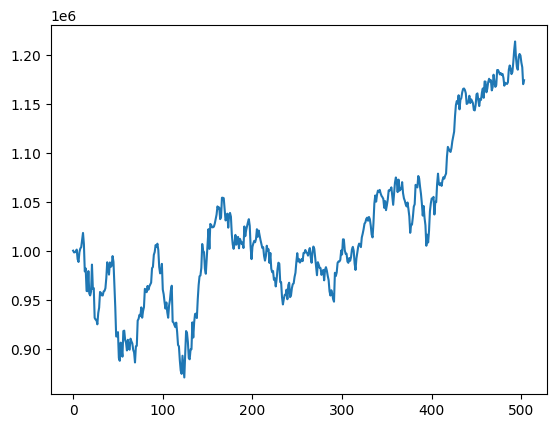

In [149]:
%matplotlib inline
df_account_value.account_value.plot()

In [150]:
print("==============Get Backtest Results===========")
now = datetime.datetime.now().strftime('%Y%m%d-%Hh%M')

perf_stats_all = backtest_stats(account_value=df_account_value)
perf_stats_all = pd.DataFrame(perf_stats_all)

==============Get Backtest Results===========
Annual return          0.083523
Cumulative returns     0.174021
Annual volatility      0.153114
Sharpe ratio           0.601463
Calmar ratio           0.576258
Stability              0.686386
Max drawdown          -0.144940
Omega ratio            1.108005
Sortino ratio          0.871208
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.052339
Daily value at risk   -0.018925
dtype: float64


In [151]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = df_account_value['date'].iloc[0],
        end = df_account_value['date'].iloc[-1])

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========


[*********************100%%**********************]  1 of 1 completed

Shape of DataFrame:  (503, 8)
Annual return          0.051407
Cumulative returns     0.105238
Annual volatility      0.153679
Sharpe ratio           0.403644
Calmar ratio           0.280878
Stability              0.594059
Max drawdown          -0.183024
Omega ratio            1.072094
Sortino ratio          0.573879
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.019138
Daily value at risk   -0.019116
dtype: float64


In [152]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(df_account_value, 
              baseline_ticker = '^DJI', 
              baseline_start = df_account_value.loc[0,'date'],
              baseline_end = df_account_value.loc[len(df_account_value)-1,'date'])

[*********************100%%**********************]  1 of 1 completed

==============Compare to DJIA===========
Shape of DataFrame:  (503, 8)


AttributeError: 'Series' object has no attribute 'iteritems'

In [1]:
import yfinance as yf


In [2]:
# Specify the ticker symbol
ticker_symbol = 'AAPL'  # Example: Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch company info
company_info = ticker.info
print("Company Info:", company_info)

# Fetch financials (Income Statement)
income_statement = ticker.financials
print("Income Statement:", income_statement)

# Fetch balance sheet
balance_sheet = ticker.balance_sheet
print("Balance Sheet:", balance_sheet)

# Fetch cash flow statement
cash_flow = ticker.cashflow
print("Cash Flow Statement:", cash_flow)

# Fetch earnings (Quarterly)
earnings = ticker.earnings
print("Earnings:", earnings)

# Fetch quarterly earnings
quarterly_earnings = ticker.quarterly_earnings
print("Quarterly Earnings:", quarterly_earnings)

# Fetch sustainability metrics
sustainability = ticker.sustainability
print("Sustainability:", sustainability)

# Fetch recommendations
recommendations = ticker.recommendations
print("Recommendations:", recommendations)

# Fetch major holders
major_holders = ticker.major_holders
print("Major Holders:", major_holders)

# Fetch institutional holders
institutional_holders = ticker.institutional_holders
print("Institutional Holders:", institutional_holders)

Company Info: {'address1': 'One Apple Park Way', 'city': 'Cupertino', 'state': 'CA', 'zip': '95014', 'country': 'United States', 'phone': '408 996 1010', 'website': 'https://www.apple.com', 'industry': 'Consumer Electronics', 'industryKey': 'consumer-electronics', 'industryDisp': 'Consumer Electronics', 'sector': 'Technology', 'sectorKey': 'technology', 'sectorDisp': 'Technology', 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and po

YFNotImplementedError: Have not implemented fetching 'earnings' from Yahoo API

In [1]:
import yahooquery
from yahooquery import Screener

ModuleNotFoundError: No module named 'yahooquery'

In [3]:
import requests
from bs4 import BeautifulSoup

# URL to scrape
url = "https://finance.yahoo.com/quote/"

# Send a request to the webpage
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the content of the request with BeautifulSoup
    soup = BeautifulSoup(response.content, 'html.parser')

    # Find all links on the page
    links = soup.find_all('a', href=True)

    # Filter out the sub-links that start with the base URL
    base_url = "https://finance.yahoo.com"
    sub_links = [base_url + link['href'] for link in links if link['href'].startswith('/quote/')]

    # Print all sub-links
    for sub_link in sub_links:
        print(sub_link)
else:
    print("Failed to retrieve the webpage. Status code:", response.status_code)


Failed to retrieve the webpage. Status code: 404


In [4]:
import requests

# URL of the raw file
url = "https://raw.githubusercontent.com/rreichel3/US-Stock-Symbols/main/amex/amex_tickers.txt"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Get the content of the file
    tickers = response.text
    # Split the content by new lines to get a list of tickers
    tickers_list = tickers.splitlines()
    
    # Print the list of tickers
    print(tickers_list)
else:
    print("Failed to retrieve the file. Status code:", response.status_code)


['AAMC', 'ACU', 'ADRT', 'AE', 'AEF', 'AEON', 'AIM', 'AINC', 'AIRI', 'AMBI', 'AMBO', 'AMS', 'APT', 'AREN', 'ARMN', 'ARMP', 'ASM', 'ASXC', 'ATCH', 'ATEK', 'ATNM', 'AULT', 'AULT', 'D', 'AUMN', 'AUST', 'AWX', 'AXIL', 'AZTR', 'BACA', 'BATL', 'BCV', 'BCV', 'A', 'BDL', 'BEEP', 'BGI', 'BHB', 'BHM', 'BITE', 'BKTI', 'BLUA', 'BMTX', 'BQ', 'BRBS', 'BRN', 'BTG', 'BTTR', 'CANF', 'CATX', 'CCEL', 'CEI', 'CET', 'CEV', 'CHAA', 'CHRO', 'CIK', 'CIX', 'CKX', 'CLDI', 'CLM', 'CMCL', 'CMT', 'CNDA', 'COE', 'COHN', 'CPHI', 'CRF', 'CTGO', 'CTM', 'CVM', 'CVR', 'CVU', 'CYBN', 'DC', 'DDC', 'DHY', 'DIT', 'DLA', 'DMF', 'DMYY', 'DNN', 'DPSI', 'DSS', 'DXF', 'EAD', 'ECF', 'ECF', 'A', 'EFSH', 'EIM', 'ELA', 'ELLO', 'ELMD', 'EMX', 'ENSV', 'ENX', 'EP', 'EPM', 'EQX', 'ERC', 'ERH', 'ESP', 'EVBN', 'EVE', 'EVI', 'EVM', 'EVV', 'FAX', 'FCO', 'FLYX', 'FOXO', 'FRD', 'FSI', 'FSP', 'FTF', 'FURY', 'GAU', 'GBR', 'GENC', 'GGN', 'GGN', 'B', 'GLDG', 'GLO', 'GLQ', 'GLU', 'GLU', 'B', 'GLV', 'GNS', 'GORO', 'GRF', 'GRFX', 'GROY', 'GSAT', 'GTE

In [29]:
import yfinance as yf
import pandas as pd
ticker_symbol = 'AEON'  # Example: Apple Inc.

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch company info
company_info = ticker.info
print("Company Info:", company_info)

#fetch annual asset growth
# Fetch historical balance sheet data (quarterly or annually)
balance_sheet = ticker.balance_sheet

x = balance_sheet.to_string()
print(balance_sheet.to_string())
y = balance_sheet.loc['Total Assets']
y



Company Info: {'address1': '5 Park Plaza', 'address2': 'Suite 1750', 'city': 'Irvine', 'state': 'CA', 'zip': '92614', 'country': 'United States', 'phone': '(949) 354-6499', 'website': 'https://www.aeonbiopharma.com', 'industry': 'Biotechnology', 'industryKey': 'biotechnology', 'industryDisp': 'Biotechnology', 'sector': 'Healthcare', 'sectorKey': 'healthcare', 'sectorDisp': 'Healthcare', 'longBusinessSummary': 'AEON Biopharma, Inc., a clinical stage biopharmaceutical company, focuses on developing botulinum toxins. It develops ABP-450 (prabotulinumtoxinA) injection for debilitating medical conditions, which completed Phase 2 study for the treatment of cervical dystonia and has an ongoing Phase 2 study for the treatment of both chronic and episodic migraine, as well as develops ABP-450 for the treatment of gastroparesis and posttraumatic stress disorder. The company is based in Irvine, California.', 'fullTimeEmployees': 10, 'companyOfficers': [{'maxAge': 1, 'name': 'Mr. Marc  Forth', 'ag

2023-12-31     6845000.0
2022-12-31    10778000.0
2021-12-31     6436000.0
2020-12-31    21214000.0
2019-12-31           NaN
Name: Total Assets, dtype: object